In [29]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  


In [30]:
df = pd.read_csv('csv/gameandgrade.csv')

In [31]:

df = df.astype(str)


df = df.replace(r'(\d+)\.\.(\d+)', r'\1.\2', regex=True)


for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df.dropna() 
df = df[df.duplicated() == False]
df.duplicated().sum()


np.int64(0)

In [32]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
3,0,1,3,5,1,1,2,2,3,45.0
4,1,1,1,1,2,1,1,3,4,85.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               754 non-null    int64  
 1   School Code       754 non-null    int64  
 2   Playing Years     754 non-null    int64  
 3   Playing Often     754 non-null    int64  
 4   Playing Hours     754 non-null    int64  
 5   Playing Games     754 non-null    int64  
 6   Parent Revenue    754 non-null    int64  
 7   Father Education  754 non-null    int64  
 8   Mother Education  754 non-null    int64  
 9   Grade             754 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 64.8 KB


In [34]:
X = df[["Playing Years"]] 
Y = df["Grade"] 

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)


Training Set:
     Playing Years
234              0
131              1
44               4
70               0
503              0
..             ...
71               1
106              0
270              0
438              3
102              1

[603 rows x 1 columns]
234     65.00
131     57.75
44      69.00
70      90.00
503     90.00
        ...  
71      70.00
106     72.50
270     70.00
438    100.00
102     70.00
Name: Grade, Length: 603, dtype: float64

Testing Set:
     Playing Years
593              2
259              2
668              0
77               4
213              2
..             ...
599              1
90               0
358              3
208              0
69               3

[151 rows x 1 columns]
593     87.0
259     80.0
668     46.5
77      85.0
213     50.0
       ...  
599     75.0
90     100.0
358     60.0
208     68.0
69      65.0
Name: Grade, Length: 151, dtype: float64


In [37]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [38]:
print(f"Intercept (b): {model.intercept_:.2f}") 
print(f"Coefficient (m): {model.coef_[0]:.2f}") 

Intercept (b): 78.12
Coefficient (m): -0.78


In [39]:
Y_pred = model.predict(X_test)

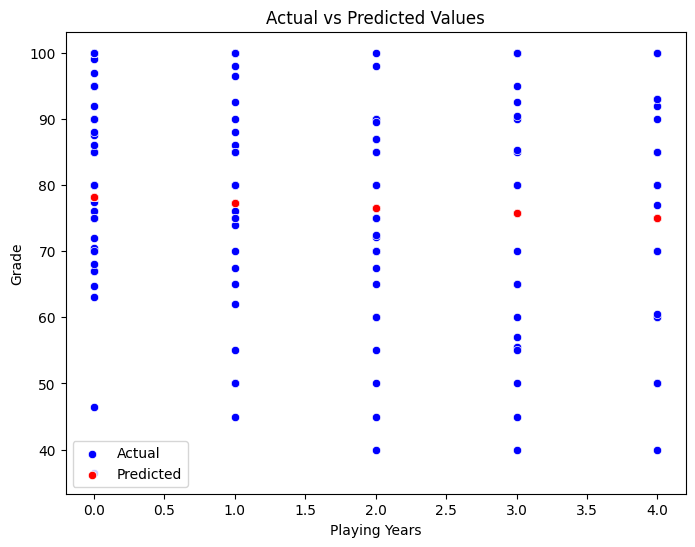

In [40]:
plt.figure(figsize=(8,6))

# Scatter plot of actual 
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Playing Years")
plt.ylabel("Grade")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [41]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 271.74
R² Score: 0.01
